# Linear regression

<ins>Data:</ins> a list of second-hand cars with the respective price, type of body, mileage, engine volume, engine type, year of production, model, and information about the time when they were registered.

<ins>Goal:</ins> predict the price of a used car depending on its specifications.

# Table of contents 

1. [Importing the relevant libraries and loading the raw data](#start)
2. [Preprocessing](#2)
    1. [Missing values](#2.1)
    2. [The probability distribution functions. Dealing with outliers](#2.2)
3. [Checking the OLS assumptions](#3)
    1. [Linearity](#3.1)
    2. [Relaxing the assumptions](#3.2)
    3. [No endogeneity](#3.3)
    4. [Normality and homoscedasticity](#3.4)
    5. [No autocorrelation](#3.5)
    6. [Multicollinearity](#3.6)
4. [Create dummy variables](#4)
    1. [Rearrange a bit](#4.1)
    2. [Checking VIFs](#4.2)
5. [Linear regression model](#5)
    1. [Declare the inputs and the targets, scale the data, split](#5.1)
    2. [Create the regression](#5.2)
    3. [The weights and bias](#5.3)
6. [Testing and conclusion](#6)
    1. [Testing](#6.1)
    2. [Conclusion](#6.2)

## Importing the relevant libraries and loading the raw data <a name="start"></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing <a name="2"></a>

The descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


The variables of interest

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Missing values <a name="2.1"></a>

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# drop all missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### The probability distribution functions. Dealing with outliers <a name="2.2"></a>

In [7]:
def density_graphs(data):
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    sns.histplot(data['Price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 40, ax = axes[0,0])
    sns.histplot(data['Mileage'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 40, ax = axes[0,1])
    sns.histplot(data['EngineV'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 30, ax = axes[1,0])
    sns.histplot(data['Year'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 30, ax = axes[1,1])

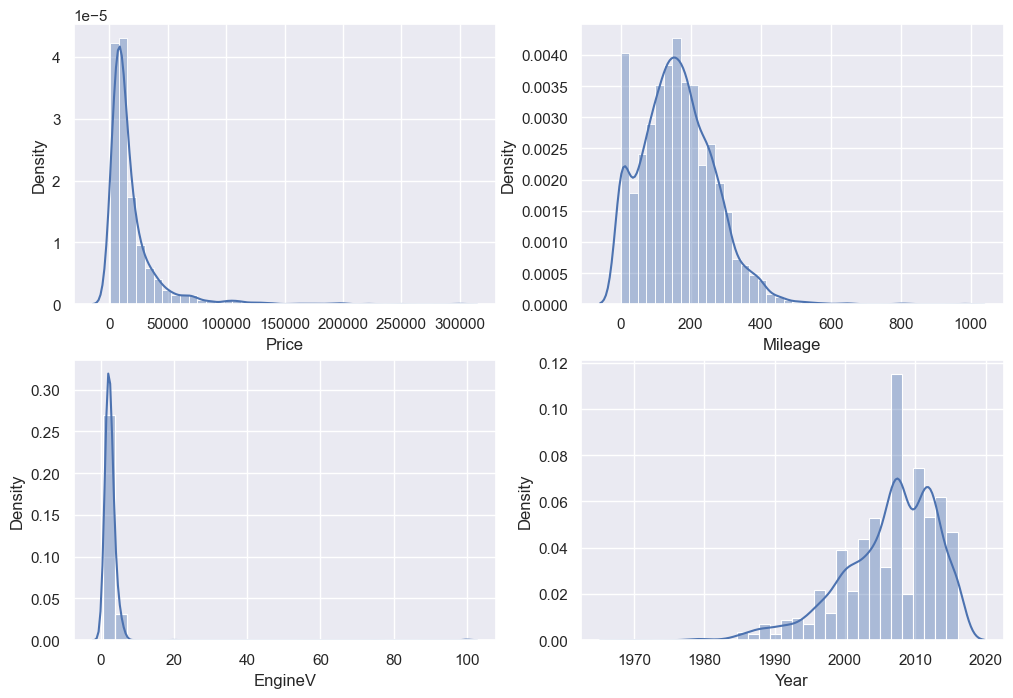

In [8]:
density_graphs(data_no_mv)

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [10]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]

In [11]:
# car engine volumes are usually below 6.5l
data_3 = data_2[data_2['EngineV'] < 6.5]

In [12]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

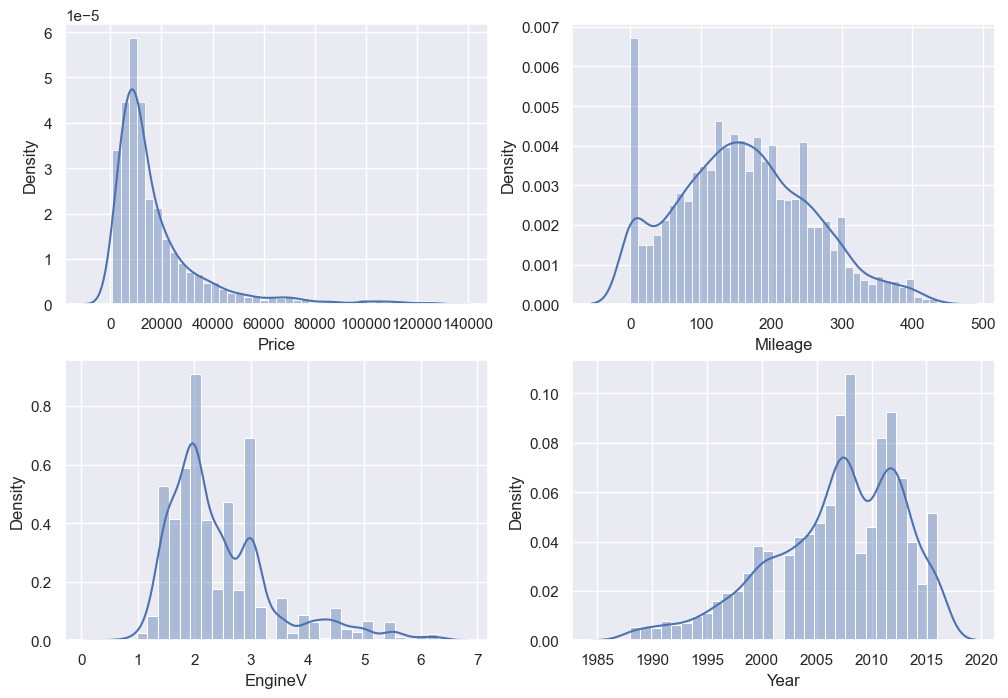

In [13]:
density_graphs(data_4)

In [14]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions <a name="3"></a>

### Linearity <a name="3.1"></a>

In [15]:
def linear_graphs(y_value):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
    ax1.scatter(data_cleaned['Year'],data_cleaned[y_value])
    ax1.set_title('Price and Year')
    ax2.scatter(data_cleaned['EngineV'],data_cleaned[y_value])
    ax2.set_title('Price and EngineV')
    ax3.scatter(data_cleaned['Mileage'],data_cleaned[y_value])
    ax3.set_title('Price and Mileage')
    plt.show()

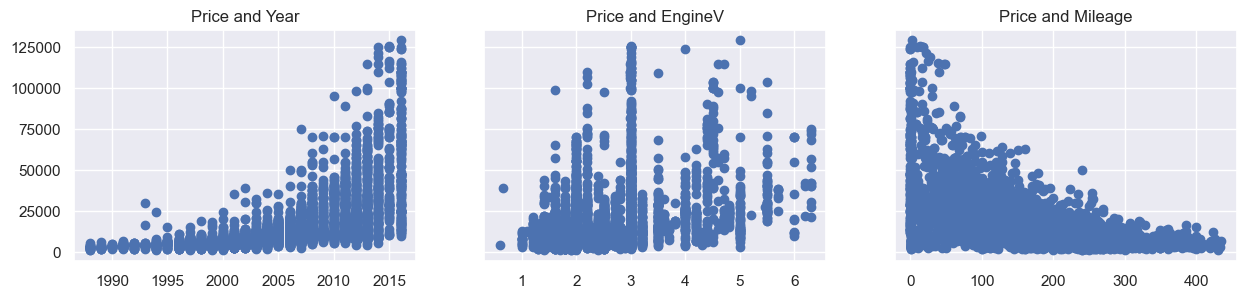

In [16]:
linear_graphs('Price')

<AxesSubplot:xlabel='Price', ylabel='Density'>

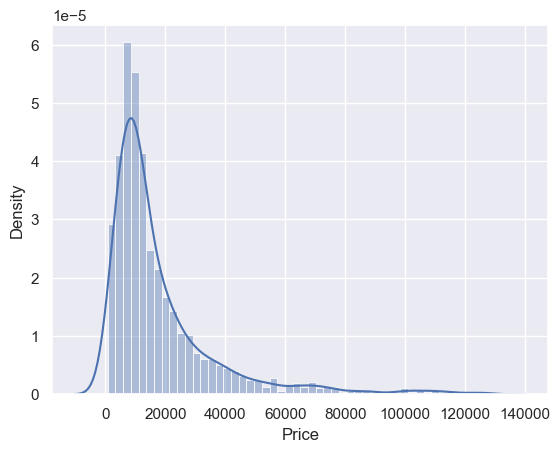

In [17]:
sns.histplot(data_cleaned['Price'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 50)

### Relaxing the assumptions <a name="3.2"></a>

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

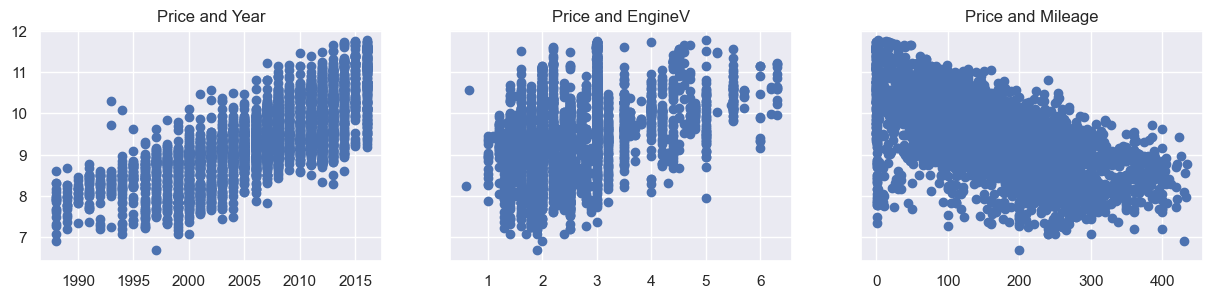

In [19]:
linear_graphs('log_price')

In [20]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### No endogeneity <a name="3.3"></a>

The assumption is not violated, so it is of on interest. Will be discused after the regression is created. Possible to see it on the graphs.

### Normality and homoscedasticity <a name="3.4"></a>

<ul>
    <li><i>normality</i> is assumed for a big sample following the central limit theorem</li> 
    <li><i>zero mean</i> is acconplished through the inclusion of the intercept</li>
    <li><i>nomoscedasticity</i> generally holds, it is seen in the graphs (there are "barriers" around all data); log transformation is the most common fix for homoscedasticity</i> </li>
</ul>

### No autocorrelation <a name="3.5"></a>

The observations are not comming from time series data or panel data. Logically, there is no reason for the observations to be dependen on each other.

### Multicollinearity <a name="3.6"></a>

In [21]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [22]:
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [23]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


If VIF = 1: no multicollinearity </br>
1 < VIF < 5: perfectly okay </br>
VIF > 10: unacceptable

In [24]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables <a name="4"></a>

In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit <a name="4.1"></a>

In [26]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [27]:
# the preferred order
# dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [28]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Checking VIFs <a name="4.2"></a>

In [29]:
variables2 = data_preprocessed[['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']]
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif2["Features"] = variables2.columns
vif2

,VIF,Features
0,41.981260,log_price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


Obviously, 'log_price' has a very high VIF. This implies it is most definitely linearly correlated with all the other variables. The linear regression is used to determine 'log_price' given values of the independent variables.

However, to actually assess multicollinearity for the predictors, 'log_price' should be dropped. The multicollinearity assumption refers only to the idea that the independent variables shoud not be collinear.

In [30]:
variables2 = data_preprocessed.drop(['log_price'],axis=1)
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif2["Features"] = variables2.columns
vif2

,VIF,Features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


All VIFs are pretty much acceptable (less than 10, moreover almost all of them less than 5).
The ones that are particularly high are 'EngineV' and 'Registration_yes'.


## Linear regression model <a name="5"></a>

### Declare the inputs and the targets, scale the data, split <a name="5.1"></a>

In [31]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression <a name="5.2"></a>

In [32]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

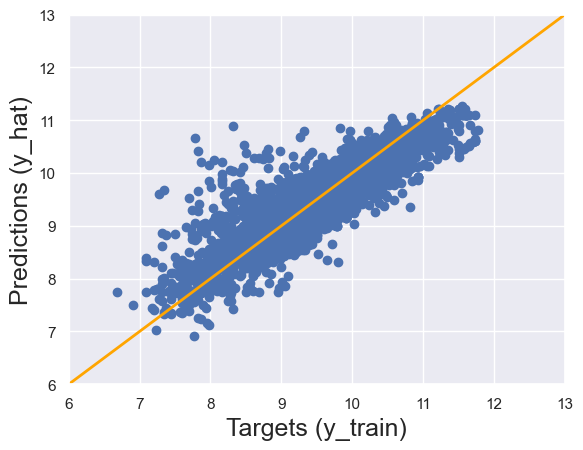

In [33]:
y_hat = reg.predict(x_train)
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
x_check = np.linspace(5, 15, 1000)
y_check = x_check    #numbers from table
fig = plt.plot(x_check, y_check, lw=2, c='orange', label='45 degree')
plt.show()

In the best case scenario, the 45 degree line can be drawn, it shows the best possible match, between targets and predictions. The closer scatter plot is to this line, the better the model.
The result is not perfect, but definitely not random.

Text(0.5, 1.0, 'Residuals PDF')

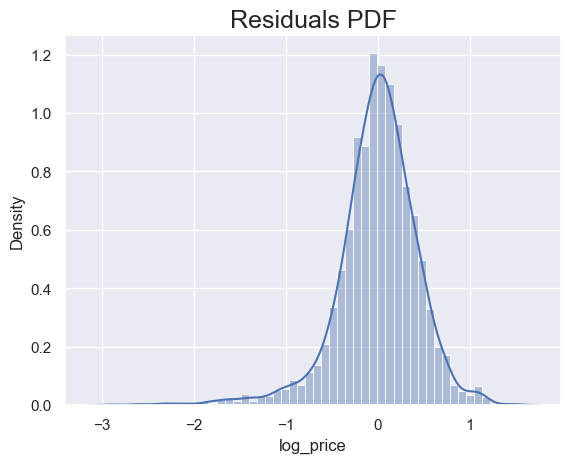

In [34]:
sns.histplot(y_train - y_hat, kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, bins = 50)
plt.title("Residuals PDF", size=18)

In the best case scenario this plot should be normally distributed. In that case there are many negative residuals (far away from the mean).
Given the definition of the residuals (y_train - y_hat), negative values imply that y_hat (predictions) are much higher than y_train (the targets). This is food for thought to improve model.

In [35]:
# the R-squared of the model
reg.score(x_train,y_train)

0.744996578792662

### The weights and bias <a name="5.3"></a>

The bias (intercept) of the regression

In [36]:
reg.intercept_

9.415239458021299

The weights (coefficients) of the regression

In [37]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [38]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [39]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

#### Weights interpretation

<ol>
<li>Continuous variables</li>
    <ul>
    <li>A <i>positive weight</i> shows that as a feature increases in value, so do th log_price, and "Price" respectively</li>
    <li>A <i>negative weight</i> shows that as a feature increases in value, log_price and "Price" decrease</li>
    </ul>
<li>Dummy variables</li>
    <ul>
    <li>A <i>positive weight</i> shows that the respective category (Brand) is <i>more expensive</i> than the benchmark (Audi)</li>
    <li>A <i>negative weight</i> shows that the respective category (Brand) is <i>less expensive</i> than the benchmark (Audi)</li>
    </ul>
</ol>

## Testing and conclusion <a name="6"></a>

### Testing <a name="6.1"></a>

In [40]:
y_hat_test = reg.predict(x_test)

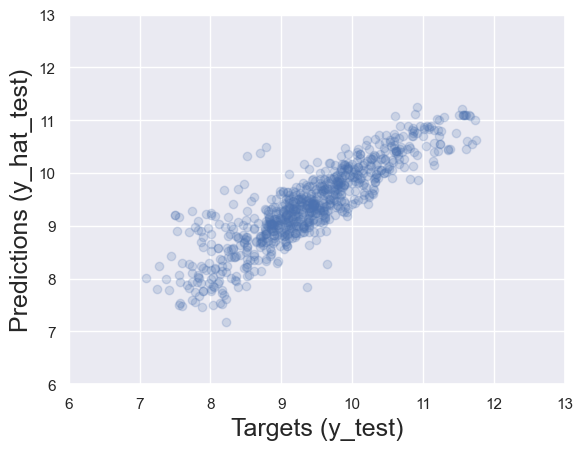

In [41]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [42]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [43]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [44]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [45]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


The minimum difference in percentages is 0.06%. The output is spot on. </br>
The maximum difference in percentages. The output is pretty off mark.</br>
The percentiles tell that most of the predictions are relatively close.

In [46]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


### Conclusion <a name="6.2"></a>

There exist only a handful of predictions that deviate considerably from the observed values. Those observed prices are extremely low: 3,000, 4500, 2600, 1700...  The underlying model utilizes a combination of parameters, such as mileage, engine volume, brand, registration, and body type to predict the price of a used car. Although the model performs satisfactorily on average, it falls short in accurately predicting the price for the latest samples. An important note is that all residuals for these outliers are negative. Therefore, their predictions are higher than the targets.

One plausible explanation for this deviation is the possibility that the model has not accounted for an important factor that leads to a reduction in the price of a used car. It may be the model of the car which was removed at the beginning of the analysis. Alternatively, it is probable that the car was subjected to some sort of damage that has not been disclosed.

<b>Ways to improve the model:</b>
<ol>
<li>Use a different set of variables, which can improve the model's predictive power</li>
<li>Remove a bigger part of outliers. However, caution is needed to avoid losing valuable information.</li>
</ol>